##  Data Loading

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [99]:
pd.set_option("display.max.columns", None)

In [100]:
xlsx_path='credit-card-default.xlsx'
df=pd.read_excel(xlsx_path)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Data Dictionary
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female* )
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE : Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* Default payment (1=yes, 0=no)default.payment.next.month: 

In [101]:
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

## Exploratory Data Analysis (EDA)


In [102]:
df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'defaulted']

In [103]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


####  Datatypes

In [104]:
df.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
defaulted    int64
dtype: object

All the datatypes looks perfect.

#### Null values

In [105]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

There is no null values in the dataset.

####  PAY_0

The `PAY_0` column can be renamed as `PAY_1` for better understanding

In [106]:
df.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

We can set the ID columns as index.

#### ID

In [107]:
df.ID.nunique()

30000

In [108]:
df.set_index('ID',inplace=True)


#### EDUCATION

The `EDUCATION` column in the dataset contains `6` categories among which 5 and 6 are both unknown columns we can change the categories
of these columns to others that is to `4`th category.

In [109]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [110]:
df.loc[(df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6), "EDUCATION"] = 4

In [111]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

#### SEX

In [112]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [113]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

#### MARRIAGE

In [114]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

There are 4 categories in this `MARRIAGE` columns. Marital status (1=married, 2=single, 3=others). But there is also 0 in this column so we can replace this 0 to 3(Others).

In [115]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [116]:
df['MARRIAGE'].replace(0,3,inplace=True)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

#### defaulted

In [117]:
df['defaulted'].unique()

array([1, 0], dtype=int64)

In [118]:
df['defaulted'].value_counts()

0    23364
1     6636
Name: defaulted, dtype: int64

There is imbalance in the dataset which should be handled.

#### PAY_n coloumns (n for 1,2,3,4,5,6)

In [119]:
df['PAY_1'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

PAY_n columns are repayment status of customers.
It is found that there is `0, -1, -2` values in PAY_1 column. -1 stands for `paid duly` so we dont know what 0 and -2 means.
So we assumed that `0,-1,-2` values also mean `paid duly` and filled them with `0`. 

In [120]:
df['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [121]:
df.PAY_1.loc[(df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)] = 0
df.PAY_2.loc[(df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)] = 0
df.PAY_3.loc[(df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)] = 0
df.PAY_4.loc[(df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)] = 0 
df.PAY_5.loc[(df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)] = 0
df.PAY_6.loc[(df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)] = 0

In [122]:
df['PAY_1'].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

In [123]:
# Categorical columns for encoding
cat_cols = ["SEX","EDUCATION","MARRIAGE","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

### Visualization

In [124]:
def plot_cat(col):
    return df.groupby(col)['defaulted'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,7), title=col)
def bivariate_box(x, y, title):
    # labels
    order = sorted(df[x].value_counts().index.tolist())
    plt.figure(figsize=(10,6))
    # plot
    sns.boxplot(x,y, data=df, hue='loan_status',order=order)
    plt.title(title, size='15')
    return plt.show()
def plot_binned(col, bin_num):
    bins=np.linspace(min(df[col]), max(df[col]), bin_num)
    print(bins)
    labels=['B'+str(i) for i in range(bin_num-1)]
    # binning
    df2=df.copy()
    df2[col+'_bin']=pd.cut(df[col], bins, labels=labels, include_lowest=True)
    return df2.groupby(col+'_bin')['defaulted'].value_counts(normalize=True).unstack().plot(kind='bar', title=col, figsize=(12,6));

<AxesSubplot:xlabel='AGE'>

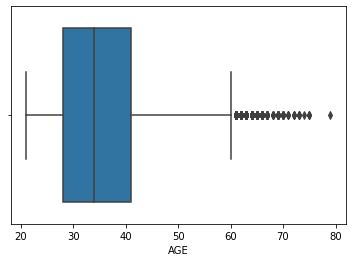

In [125]:
sns.boxplot(data=df, x=df.AGE)

In [126]:
df.loc[df.AGE>70]["AGE"].value_counts()

73    4
75    3
72    3
71    3
79    1
74    1
Name: AGE, dtype: int64

Checked whether there is any outliers in the dataset but the maximum age in the dataset is 79 which is not a mistake.

<AxesSubplot:xlabel='defaulted', ylabel='count'>

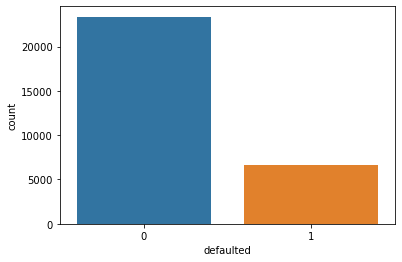

In [127]:
sns.countplot(x=df['defaulted'])

There is imbalance in the target columns we must handle the imbalance.

In [128]:
df.defaulted.value_counts()

0    23364
1     6636
Name: defaulted, dtype: int64

<AxesSubplot:title={'center':'EDUCATION'}, xlabel='EDUCATION'>

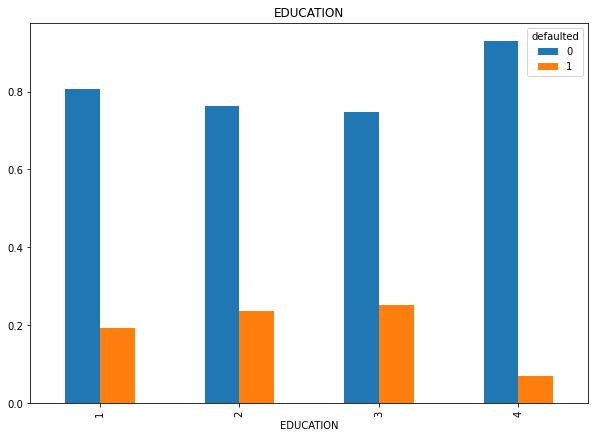

In [129]:
plot_cat("EDUCATION")

lowest rate of default is in the 4th category. 

<AxesSubplot:title={'center':'SEX'}, xlabel='SEX'>

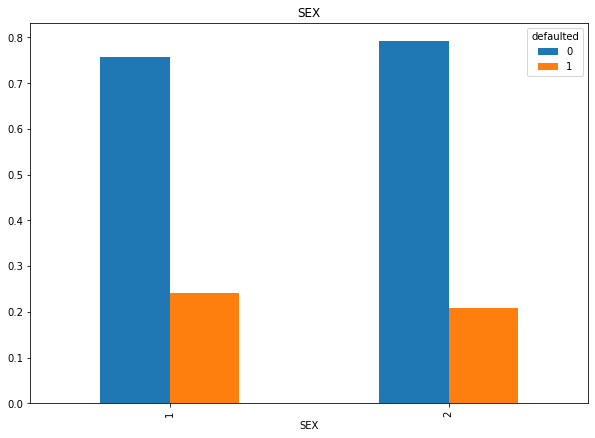

In [130]:
plot_cat("SEX")

There is a slight chance of default in male customers compared to female. 

<AxesSubplot:title={'center':'MARRIAGE'}, xlabel='MARRIAGE'>

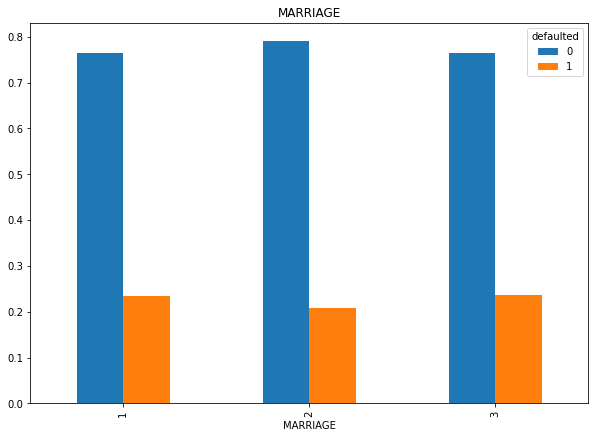

In [131]:
plot_cat("MARRIAGE")

Single customers have the lowest chance of default compared to married and divorced customers.

In [132]:
cat_cols

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

<AxesSubplot:title={'center':'PAY_1'}, xlabel='PAY_1'>

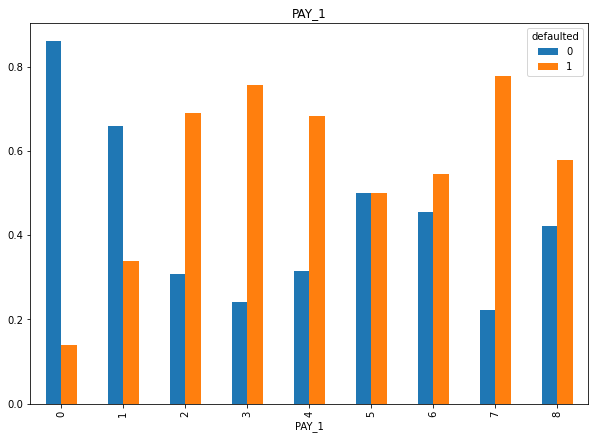

In [133]:
plot_cat("PAY_1")

<AxesSubplot:title={'center':'PAY_2'}, xlabel='PAY_2'>

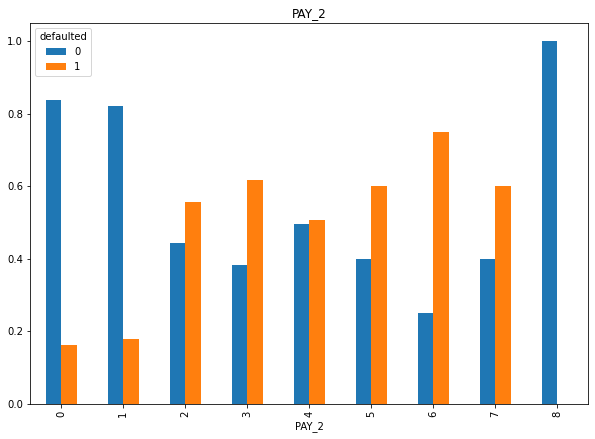

In [134]:
plot_cat("PAY_2")

<AxesSubplot:title={'center':'PAY_3'}, xlabel='PAY_3'>

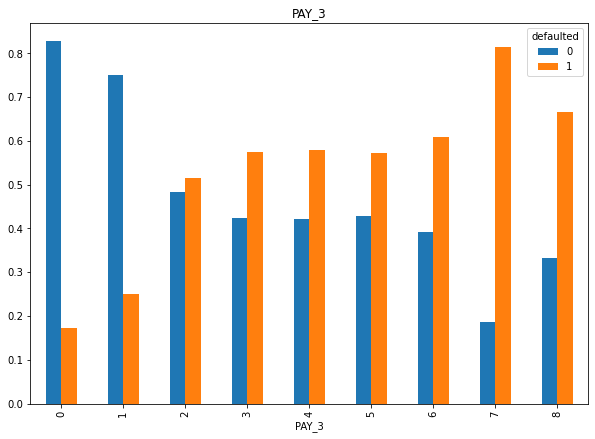

In [135]:
plot_cat("PAY_3")

<AxesSubplot:title={'center':'PAY_4'}, xlabel='PAY_4'>

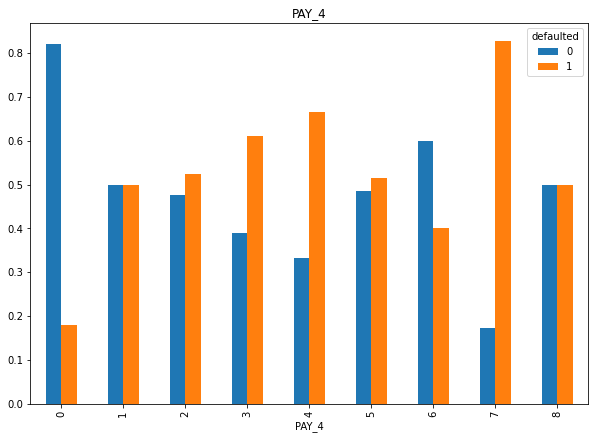

In [136]:
plot_cat("PAY_4")

<AxesSubplot:title={'center':'PAY_5'}, xlabel='PAY_5'>

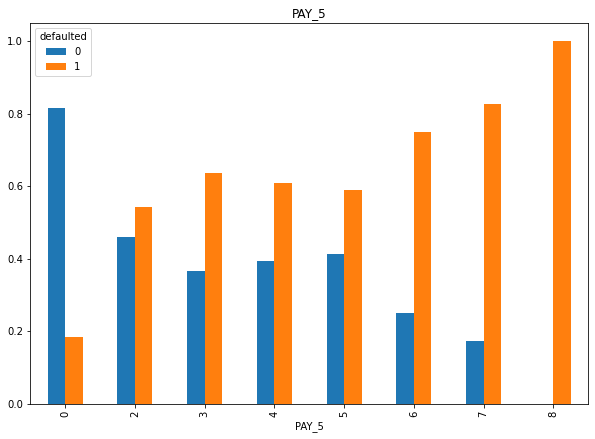

In [137]:
plot_cat("PAY_5")

<AxesSubplot:title={'center':'PAY_6'}, xlabel='PAY_6'>

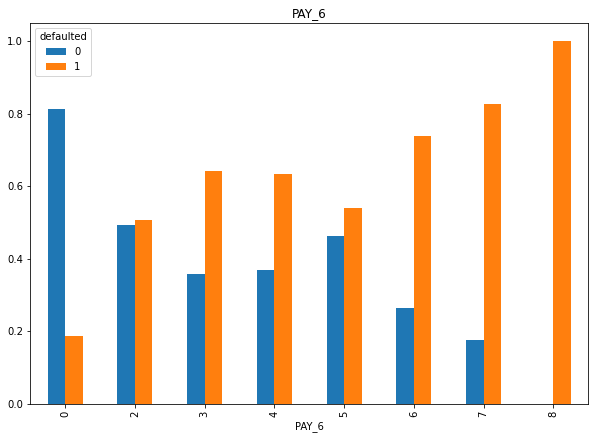

In [138]:
plot_cat("PAY_6")

By analysing the above graphs we can arrive at a conclusion that if there is a delay more than 2 months there is a high chance of default.

[  10000.  175000.  340000.  505000.  670000.  835000. 1000000.]


<AxesSubplot:title={'center':'LIMIT_BAL'}, xlabel='LIMIT_BAL_bin'>

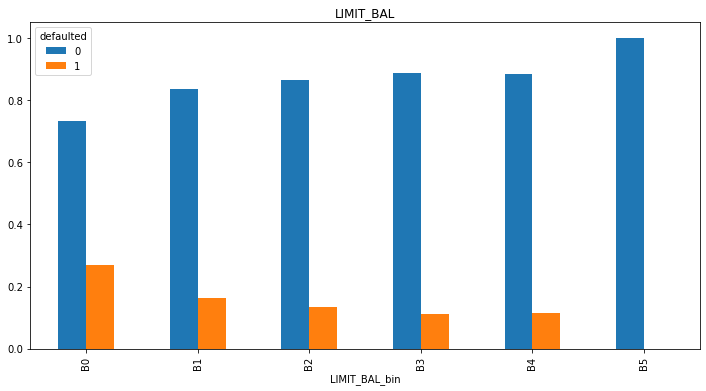

In [139]:
plot_binned("LIMIT_BAL", 7)

Customers having high credit has a lower chance of default.

[21.         30.66666667 40.33333333 50.         59.66666667 69.33333333
 79.        ]


<AxesSubplot:title={'center':'AGE'}, xlabel='AGE_bin'>

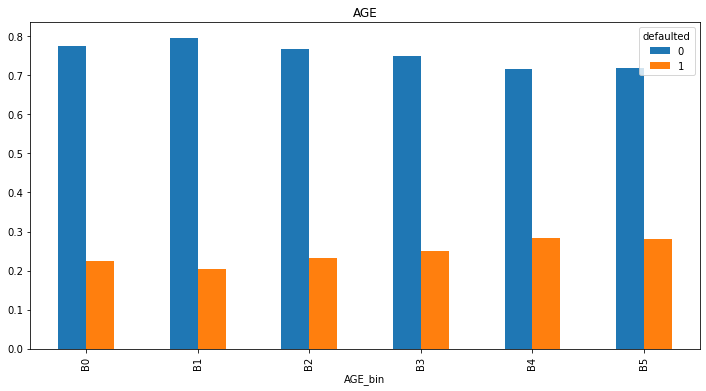

In [140]:
plot_binned("AGE", 7)

Customers of age between 50 and 60 have a higher chance of default.

### Pre-processing

In [141]:
cat_cols

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

#### Encoding the categorical columns

In [142]:
test_df = pd.concat([df,pd.get_dummies(df[cat_cols], columns=cat_cols, drop_first=True)], axis=1)

# drop the original columns
test_df.drop(cat_cols, axis=1, inplace=True)

In [143]:
df.shape

(30000, 24)

In [144]:
test_df.shape

(30000, 67)

### Handling the imbalance in the Dataset

In [145]:
from imblearn.over_sampling import ADASYN
y = test_df["defaulted"]
X = test_df.drop(["defaulted"],axis=1)

adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

print('Class Balance count : ',y.shape)

Class Balance count :  (47296,)


In [146]:
y.value_counts()

1    23932
0    23364
Name: defaulted, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [148]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

## Model Building

### 1. Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8249471458773784

Using GridSeachCV found the best parameters for the model.

In [150]:
#Fitting Decision Tree classifier to the training set  
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# classifier= RandomForestClassifier()  
# parameters = [{'n_estimators': [200, 500],
#                 'criterion' :['gini', 'entropy','log_loss'],
#               "max_features": ["sqrt", "log2", None]}]
# grid_search_rfc = GridSearchCV(verbose=2, estimator=classifier, param_grid=parameters, cv= 5,
#                                scoring="f1")
# grid_search_rfc.fit(X_train, y_train)

In [151]:
# best_accuracy = grid_search_rfc.best_score_
# best_parameters = grid_search_rfc.best_params_
# print("Best F1 score: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

In [152]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion= 'gini', max_features= 'log2', n_estimators= 500)
rf.fit(X_train, y_train)


#Predicting the test set result  
y_pred = rf.predict(X_test)  

#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report

cm = confusion_matrix(y_test, y_pred)  

In [153]:
print("Confusion Matrix : \n", cm)
print("Accuracy score : \n\t",accuracy_score (y_test, y_pred))  
print("F1 Score : \n\t", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report (y_test, y_pred))

Confusion Matrix : 
 [[3910  751]
 [ 816 3983]]
Accuracy score : 
	 0.834355179704017
F1 Score : 
	 0.8356236232036085
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      4661
           1       0.84      0.83      0.84      4799

    accuracy                           0.83      9460
   macro avg       0.83      0.83      0.83      9460
weighted avg       0.83      0.83      0.83      9460



### 2. Decision Tree 

In [154]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier 
dec_tree =  DecisionTreeClassifier()  
dec_tree.fit(X_train, y_train)
dec_tree.score(X_test, y_test)

0.7207188160676533

#### Hyperparameter tuning using GridSearchCV 

In [155]:
# classifier= DecisionTreeClassifier()  
# parameters = [{"splitter" : ["best", "random"],
#               'criterion' :["gini", "entropy", "log_loss"],
#               "max_features": [None, "sqrt", "log2"],
#               "max_depth" : [9, 13, 15]}]
# grid_search_dec_tree = GridSearchCV(verbose=2, estimator=classifier, param_grid=parameters, cv= 10,
#                                scoring="f1")
# grid_search_dec_tree.fit(X_train, y_train)

In [156]:
# best_accuracy = grid_search_dec_tree.best_score_
# best_parameters = grid_search_dec_tree.best_params_
# print("Best F1 Score: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

In [157]:
dec_tree = DecisionTreeClassifier(criterion= 'log_loss', max_depth= 13, max_features= None, splitter = 'random')
dec_tree.fit(X_train, y_train)

#Predicting the test set result  
y_pred = dec_tree.predict(X_test)
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report

cm = confusion_matrix(y_test, y_pred)  

In [158]:
print("Confusion Matrix : \n", cm)
print("r2 score : \n\t",dec_tree.score(X_test, y_test))
print("Accuracy score : \n\t",accuracy_score(y_test, y_pred))  
print("F1 Score : \n\t", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report (y_test, y_pred))

Confusion Matrix : 
 [[3488 1173]
 [1513 3286]]
r2 score : 
	 0.7160676532769557
Accuracy score : 
	 0.7160676532769557
F1 Score : 
	 0.7098725426658027
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72      4661
           1       0.74      0.68      0.71      4799

    accuracy                           0.72      9460
   macro avg       0.72      0.72      0.72      9460
weighted avg       0.72      0.72      0.72      9460



Comparing the models found that `RandomForestClassifier` is better performing than the `Decision Tree model`

#### Important Features in the model

Text(0.5, 0, 'Random Forest Feature Importance')

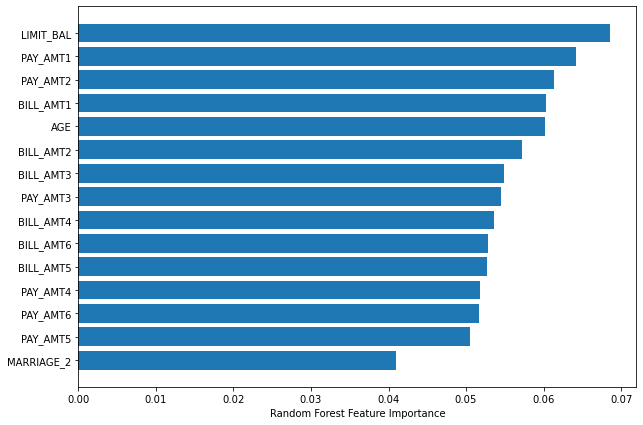

In [159]:
sorted_idx = rf.feature_importances_.argsort()[-15:]
plt.figure(figsize=(10,7))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")